# **Nettoyage des donnes**

In [ ]:
import pandas as pd
import numpy as np

# Définir les noms des colonnes à extraire
colonnes_a_extraire = ["Taille", "Poids","Age"]
# Importer les données
data = pd.read_csv('./metadata_plaice_2010-2019.csv', usecols=colonnes_a_extraire, delimiter=";", index_col=False)
# Convertir la colonne "poids" en type chaîne de caractères
nombre_lignes = data.shape[0]

print("Nombre de lignes dans votre ensemble de données :", nombre_lignes)
data = data.dropna(subset=["Age"])
data = data.dropna(subset=["Poids"])

data["Poids"] = data["Poids"].astype(str)
data["Taille"] = data["Taille"].astype(str)

# Remplacer la virgule par un point
data["Poids"] = data["Poids"].str.replace(",", ".")
data["Taille"] = data["Taille"].str.replace(",", ".")

data = data.loc[(data["Poids"] != "-1") & (data["Taille"] != "  n.") & (data["Age"] != -1.0)]
# Handle potential errors during conversion (optional)
def convert_to_numeric(x):
    try:
        return pd.to_numeric(x)
    except ValueError:
        # Handle non-numeric values (e.g., remove row, impute, or log appropriate message)
        return np.nan  # Replace with your preferred handling for non-numeric values

data["Taille"] = data["Taille"].apply(convert_to_numeric)
data["Poids"] = data["Poids"].apply(convert_to_numeric)
data = data.dropna(subset=["Poids"])
# Check for successful conversion and missing values
print(data.dtypes)  # Verify data types
print(data.isnull().sum())  # Check for missing values
# Enregistrer les données nettoyées
data.to_csv("data_nettoye.csv")


Nombre de lignes dans votre ensemble de données : 14242
Taille    float64
Poids     float64
Age       float64
dtype: object
Taille    0
Poids     0
Age       0
dtype: int64


# **Étude de la relation entre la taille et le poids avec l'age des poissons**

> Ajouter une citation






Erreur quadratique moyenne (RMSE) : 1.1515116655552766


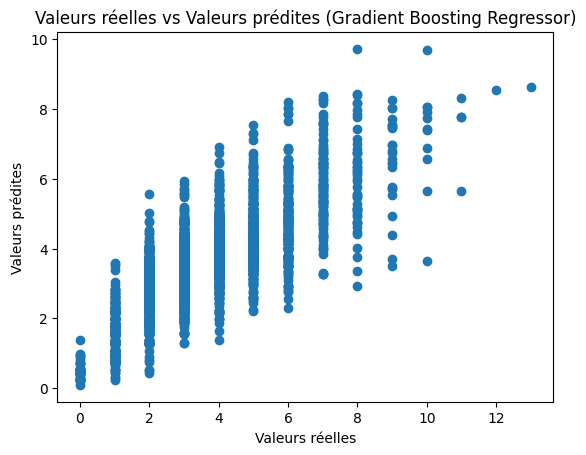

L'estimation de l'âge du poisson est : 3.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Sélectionner les caractéristiques (taille et poids) et la cible (âge)
X = data[['Taille', 'Poids']]
y = data['Age']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Prédire l'âge des poissons dans l'ensemble de test
predictions = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Erreur quadratique moyenne (RMSE) :", rmse)

# Tracer le graphique des valeurs réelles par rapport aux valeurs prédites
plt.scatter(y_test, predictions)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs Valeurs prédites (Gradient Boosting Regressor)")
plt.show()
# saisir la taille et le poids du poisson
taille_poisson = 31
poids_poisson = 388
# Créer un tableau numpy avec la taille et le poids du poisson
nouveau_poisson = np.array([[taille_poisson, poids_poisson]])
# Utiliser le modèle pour prédire l'âge du poisson
age_pred = model.predict(nouveau_poisson)
# Afficher l'estimation de l'âge du poisson
print("L'estimation de l'âge du poisson est :", age_pred[0].round(0))


# **Les Statistiques**

In [ ]:
import json
# Définir les noms des colonnes à extraire
colonnes_a_extraire = ["Sexe","Age"]
# Importer les données et nettoyer les donnes
data2 = pd.read_csv('./metadata_plaice_2010-2019.csv', usecols=colonnes_a_extraire, delimiter=";", index_col=False)
data2 = data2.dropna(subset=["Age"])
data2 = data2.dropna(subset=["Sexe"])
data2 = data2.loc[(data2["Sexe"] != "-1")  & (data2["Age"] != -1.0)]
data2['Sexe'] = data2['Sexe'].replace(['i', 'I'], 'I')

# Calculer les informations
moyenne_age_total = data2['Age'].mean().round(2)
moyenne_age_sexe = data2.groupby('Sexe')['Age'].mean().round(2)
nombres_par_sexe = (data2['Sexe'].value_counts()).to_dict()
intervalle_1_5 = (data2[(data2['Age'] >= 1) & (data2['Age'] <= 5)].shape[0] )
intervalle_5_7 = (data2[(data2['Age'] > 5) & (data2['Age'] <= 7)].shape[0] )
intervalle_plus_7 = (data2[data2['Age'] > 7].shape[0] )
nombre_lignes = data2.shape[0]

# Créer un dictionnaire contenant les informations
fisher_info = {
    "moyenne_age_total": moyenne_age_total,
    "moyenne_age_sexe": moyenne_age_sexe.to_dict(),
    "nombres_par_sexe": nombres_par_sexe,
    "pourcentage_intervalle_age": {
        "eau_douce": intervalle_1_5,
        "ocean": intervalle_5_7,
        "retour_en_eau_douce": intervalle_plus_7
    },
    "nombre_lignes": nombre_lignes
}

# Écrire les informations dans un fichier JSON
with open("fisher_info.json", "w") as json_file:
    json.dump(fisher_info, json_file, indent=4)
print("Les informations ont été stockées dans fisher_info.json.")


Les informations ont été stockées dans fisher_info.json.
